In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
loans = pd.read_csv("loan.csv", encoding = "ISO-8859-1")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
loans.shape

(39717, 111)

In [0]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [0]:
# Dropping all columns with only null values
loans=loans.dropna(axis=1,how='all')
loans.shape

(39717, 57)

In [0]:
#Remove columns with only one unique values
loans= loans.loc[:,loans.nunique()!=1]
loans.shape

(39717, 48)

In [0]:
(loans.isnull().sum(axis=0))

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [0]:
round(loans.isnull().sum()/len(loans)*100,2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
mths_since_last_record     92.99
open_acc                    0.00
pub_rec   

In [0]:
# Drop columns with more than 70% null values
loans=loans.loc[:,round(loans.isnull().sum()/len(loans)*100,2)<70]
loans.shape

(39717, 46)

In [0]:
loans.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
open_acc                       0
pub_rec                        0
revol_bal 

In [0]:
drop_columns=['id','member_id', 'emp_title', 'url', 'desc','title', 'earliest_cr_line',
              'last_pymnt_d','last_credit_pull_d','collection_recovery_fee', 'inq_last_6mths']
loans=loans.drop(drop_columns,axis=1)

In [0]:
# Converting revol_util and int_rate into a numeric type
loans.revol_util=loans.revol_util.str.rstrip('%').astype('float')
loans.int_rate=loans.int_rate.str.rstrip('%').astype('float')

# Converting zip code to numbric by removing the X coded for braveity
loans['zip_code'] = loans['zip_code'].apply(lambda s: int(s[:-2]))
loans["pub_rec_bankruptcies"].fillna(0.0, inplace=True)
loans["revol_util"].fillna(0.0, inplace=True)
loans.dtypes

loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
zip_code                    int64
addr_state                 object
dti                       float64
delinq_2yrs                 int64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                float64
total_acc                   int64
out_prncp                 float64
out_prncp_inv             float64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prnc

In [0]:
loans.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

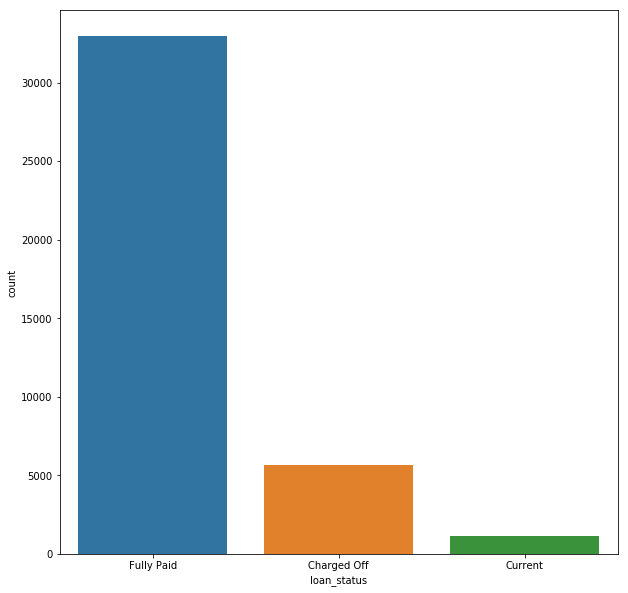

In [0]:
plt.figure(figsize=(10,10))
sns.countplot(x="loan_status", data=loans)
plt.show()

**ANALYSIS OF LOAN RESULT**

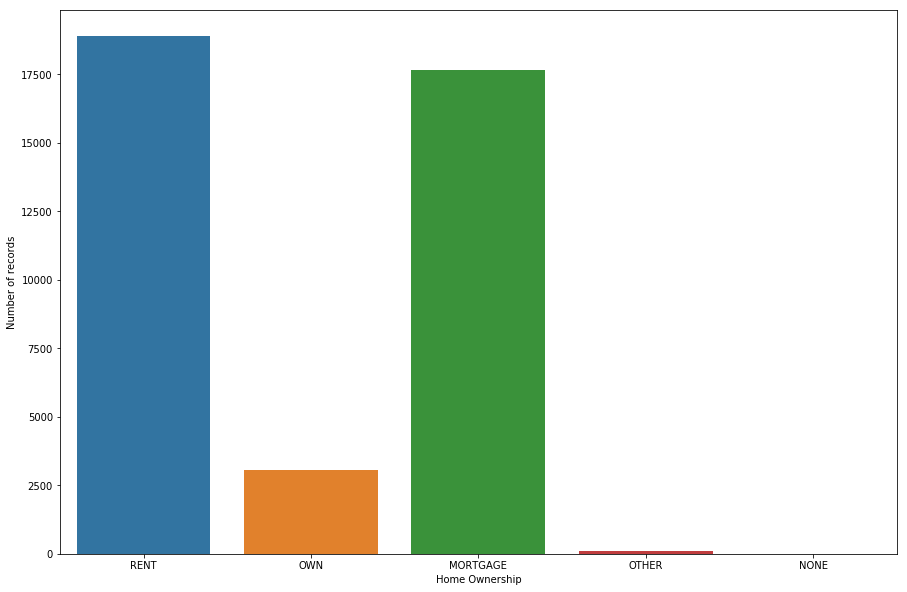

In [0]:
plt.figure(figsize=(15,10))
sns.countplot(x='home_ownership',  data=loans)
plt.xlabel("Home Ownership")
plt.ylabel("Number of records")
plt.show()

**HOME OWNERSHIP**


In [0]:
#modification for convinence
paid = loans[loans.loan_status == 'Fully Paid']
current = loans[loans.loan_status == 'Current']
default = loans[loans.loan_status == 'Charged Off']

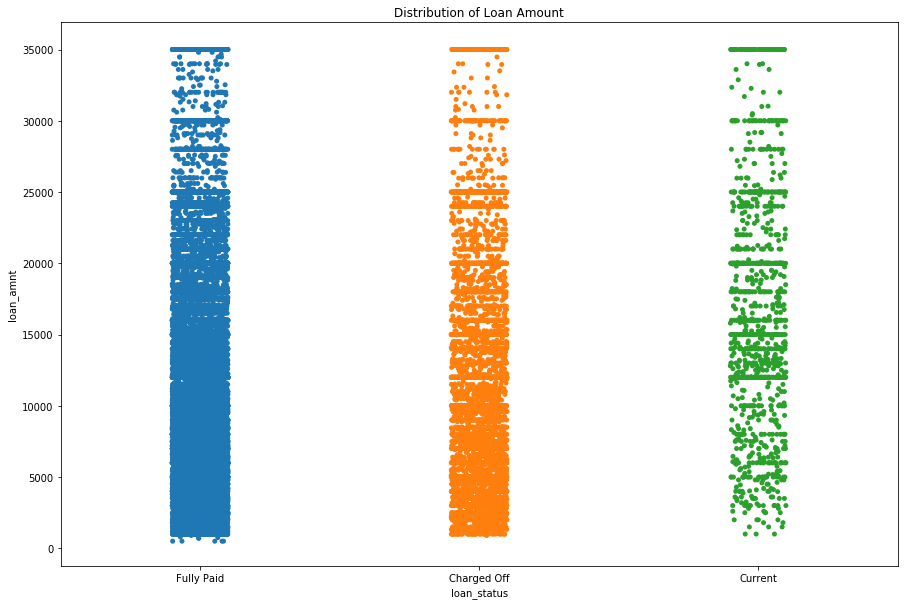

In [0]:
plt.figure(figsize=(15,10))
plt.title("Distribution of Loan Amount")
sns.stripplot(x="loan_status", y="loan_amnt", data=loans, jitter=True);
plt.show()

**THIS IS HOW LOANS ARE DISTIBUTED**

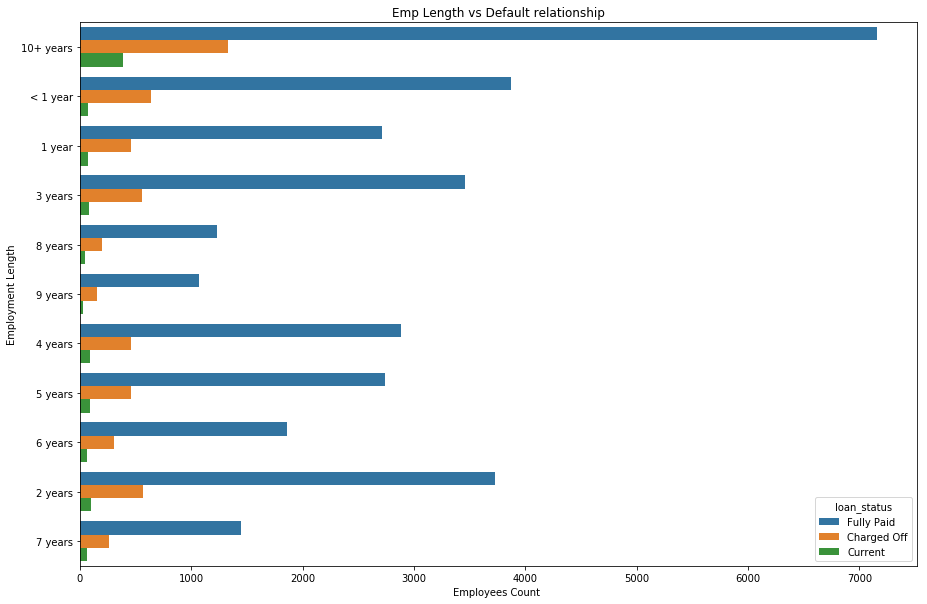

In [0]:
plt.figure(figsize=(15,10))
sns.countplot(y='emp_length',hue='loan_status',data=loans)
plt.xlabel("Employees Count ")
plt.ylabel("Employment Length")
plt.title("Emp Length vs Default relationship")
plt.show()


**RELATIONSHIP WITH  THE EMPLOYEES **

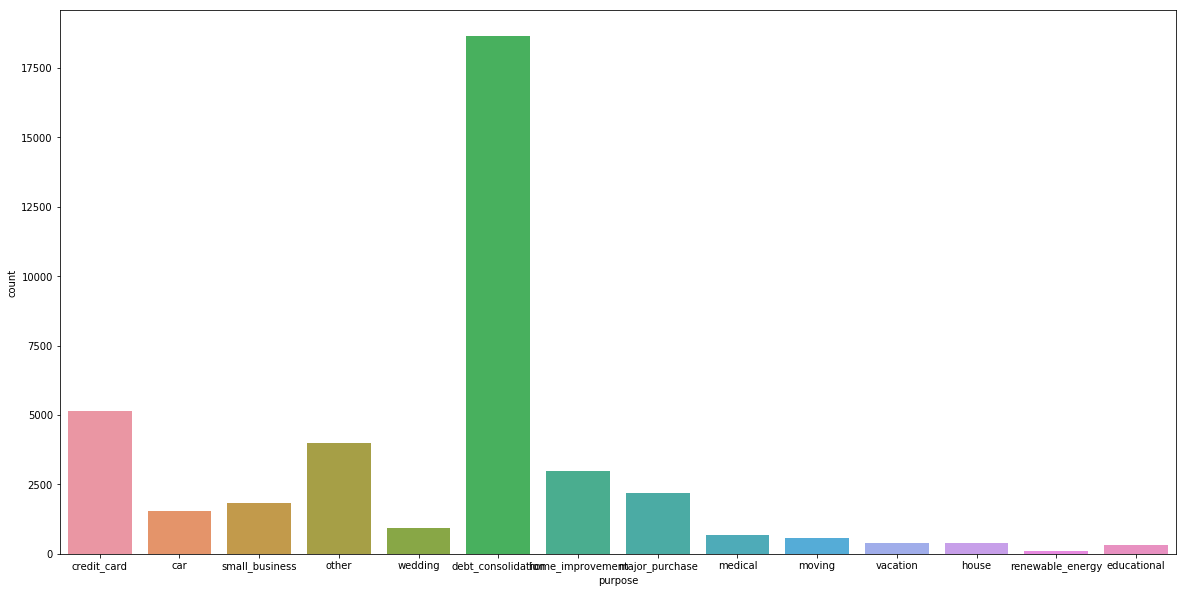

In [0]:
plt.figure(figsize=(20,10))
sns.countplot(x='purpose',  data=loans)
plt.show()

**PURPOSE FOR TAKING LOAN**

debt cons. is the major raeson on which people took loan 

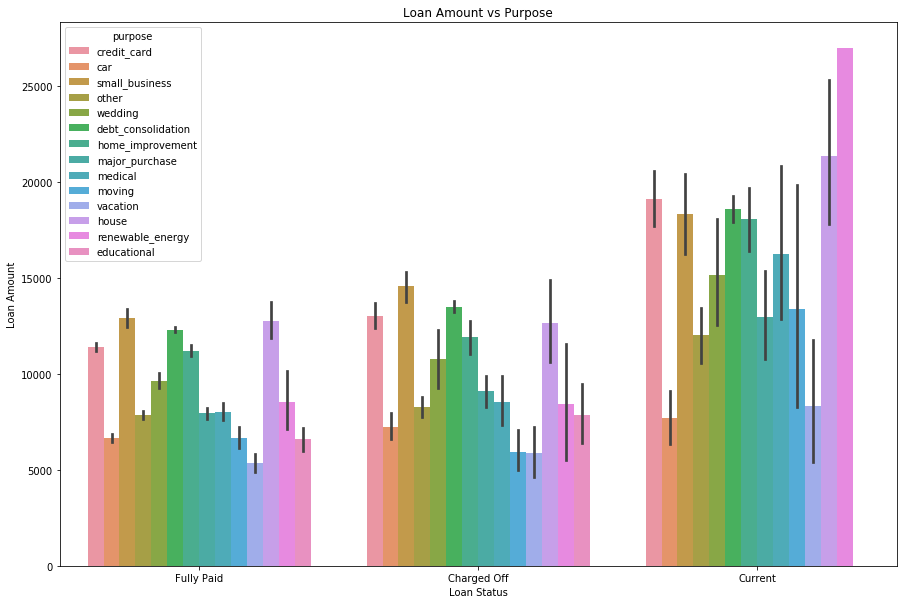

In [0]:
plt.figure(figsize=(15,10))
sns.barplot(x='loan_status',y='loan_amnt',hue='purpose',data=loans
           )
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.title("Loan Amount vs Purpose")
plt.show()

Currently most amount of loan the people took is for renewable enenrgy and most charged of for small business

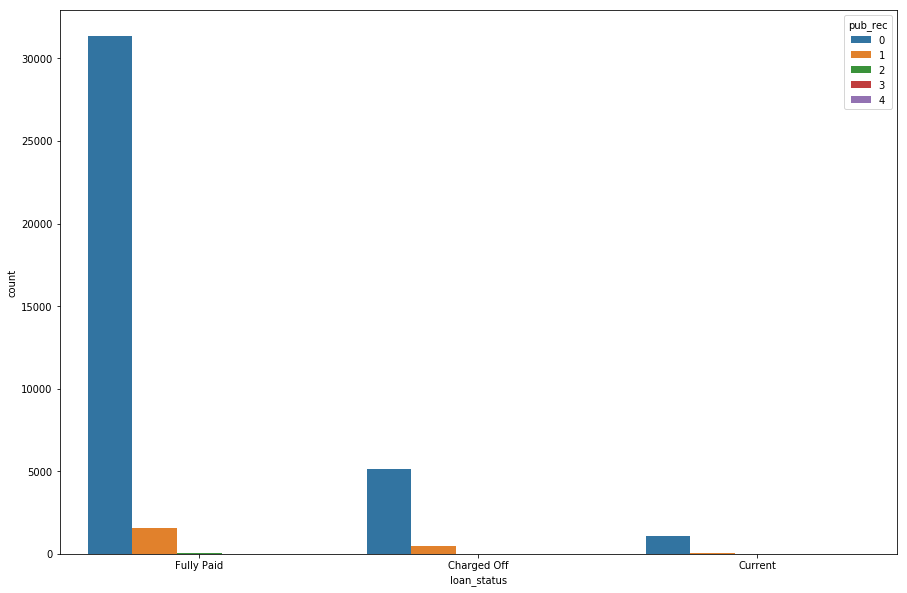

In [0]:
plt.figure(figsize=(15,10))
sns.countplot(x="loan_status", hue='pub_rec', data=loans)
plt.show()

In [0]:
loans.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

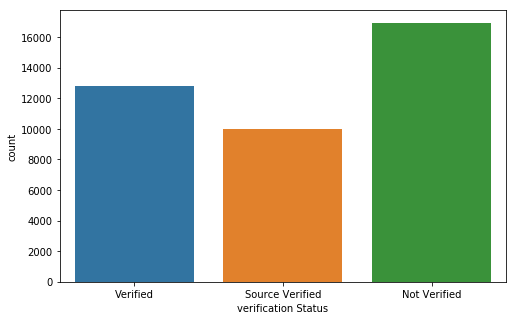

In [0]:
plt.figure(figsize=(8,5))
sns.countplot(x='verification_status', data=loans)
plt.xlabel("verification Status")
plt.show()

This shows banks careless

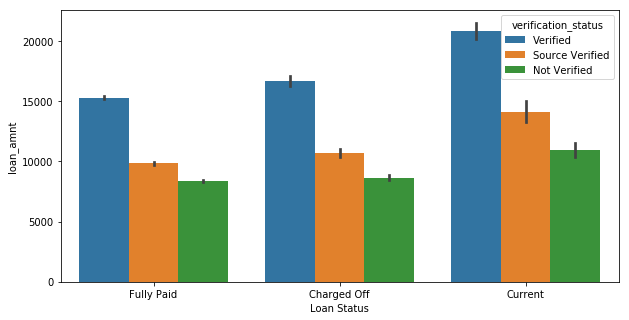

In [0]:
plt.figure(figsize=(10,5))
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=loans)
plt.xlabel("Loan Status")
plt.show()

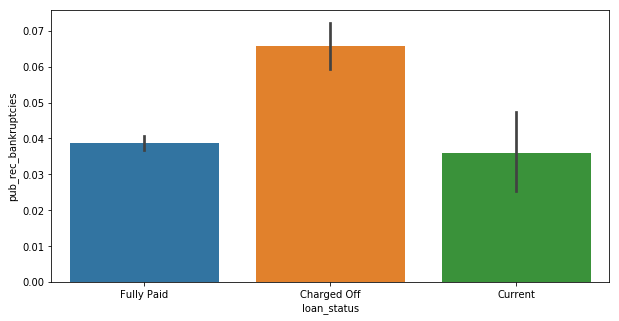

In [0]:
plt.figure(figsize=(10,5))
sns.barplot(x='loan_status',y='pub_rec_bankruptcies', data=loans)
plt.show()

bankruptcies happened due to charged off

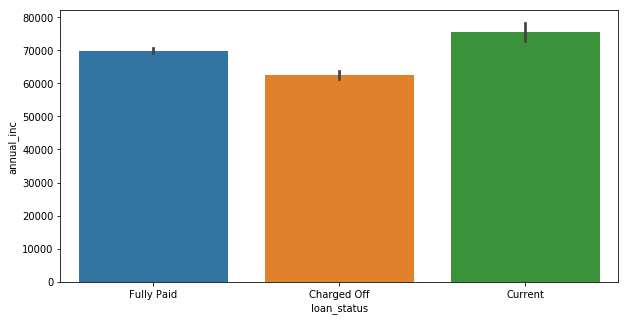

In [0]:
plt.figure(figsize=(10,5))
sns.barplot(x='loan_status',y='annual_inc', data=loans)
plt.show()

annual income less than 70000 are having the high probability of grtting charged off

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


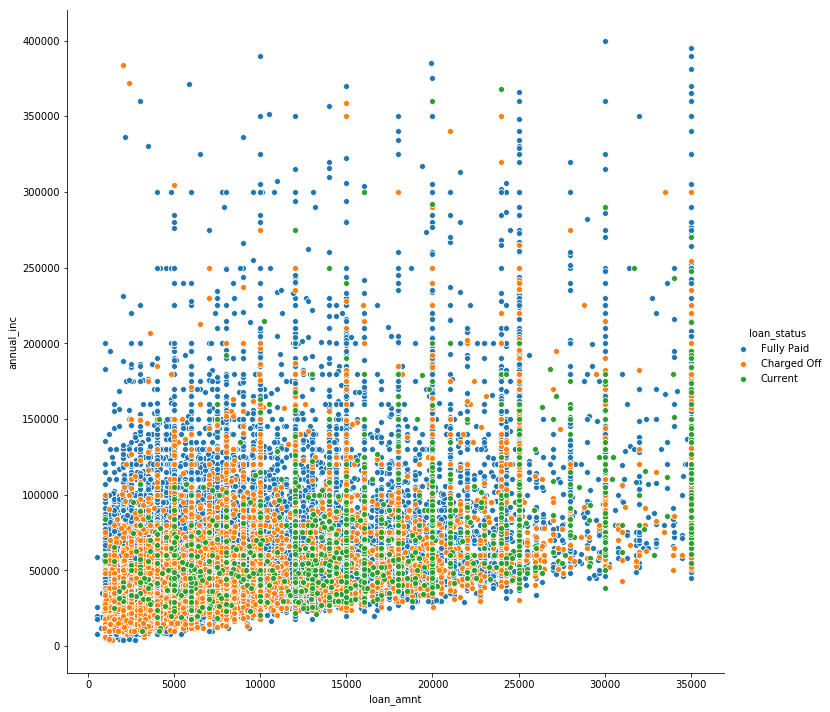

In [0]:
a = loans[loans['annual_inc'] < 400000] 
sns.pairplot(x_vars=["loan_amnt"], y_vars=["annual_inc"], data=a, hue="loan_status", size=10)
plt.show()

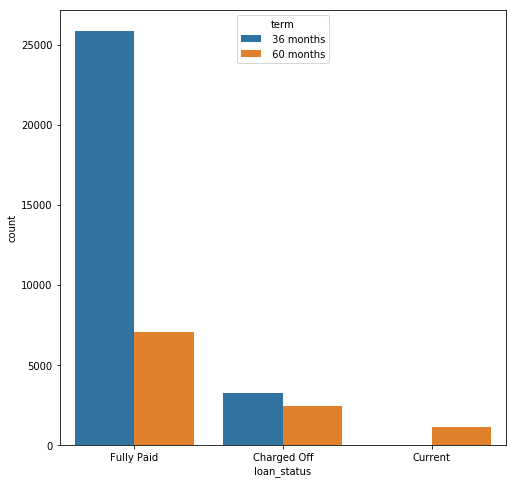

In [0]:
plt.figure(figsize=(8,8))
sns.countplot(x="loan_status", hue='term', data=loans)
plt.show()

most of the charged off are took place on 36 months term loan

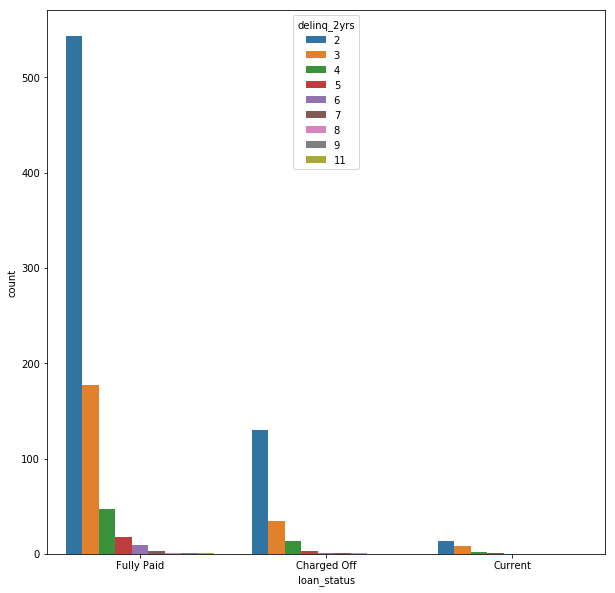

In [0]:
plt.figure(figsize=(10,10))
a = loans[loans['delinq_2yrs'] > 1]
sns.countplot(x="loan_status", hue='delinq_2yrs', data=a)
plt.show()

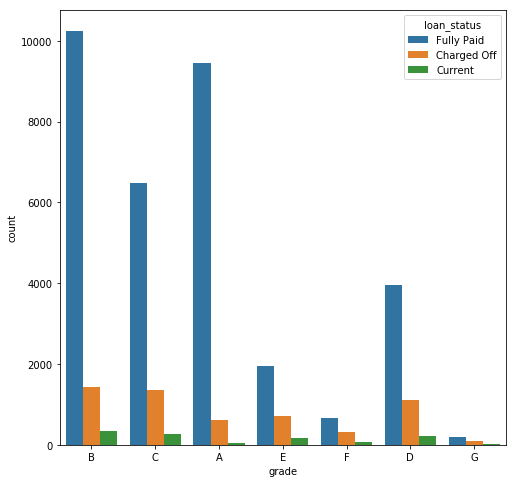

In [0]:
plt.figure(figsize=(8,8))
sns.countplot(x="grade", hue='loan_status', data=loans)
plt.show()

most of the charged off took place at B and C grade

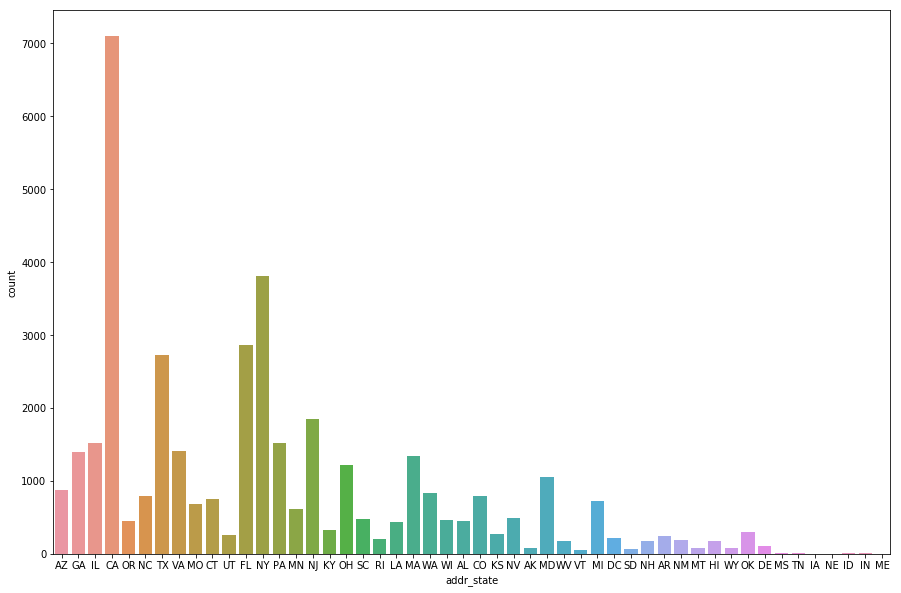

In [0]:
plt.figure(figsize=(15,10))
sns.countplot(x="addr_state", data=loans)
plt.show()

Cities that took most number of loans


# EXAMPLE
*   Name - Brandom
*   Addr - California
* working for past 8 years with CCD
* Loan Amount - 15000
* salary - 58000
* Term - 36
* Purpose - Others
* Home ownership - Mortage
* grade - C1
* reason - Plan for personal care
* Title - Looking for personal care
* Verification status - Source verified






Brandom is living in California. 

We are receiving too many loanapplications from California ,

This guy is with CCD Good making around 50k per year.

He has Mortgage oh that’s need to be checked.
He isworking for past 8 years and has mortgage as well.

His history reveals his credit grades are C having subgrade C1,little risk here it seems.

Anyways let see his purpose for loan, he has not filled it from our broad list of category and has mentioned as Others so what the reason he is looking for personal use case.

Oh, so he is having mortgage at 8 year experience and if we look at loan he is asking for is $15000 which is almost 1/4th of his salary and that too in term of 36 months.

So Assuming a interestrate of 15% his monthly installment would come around $500 which is around 10% his monthly income and he has mortgage too.

He is C grade as well. This guy is risky can charged off in Between.

# Hence DENIED LOAN .